<a href="https://colab.research.google.com/github/amrutask/DataPreparationProject/blob/master/RegressionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving nyc-jobs.csv to nyc-jobs (1).csv
User uploaded file "nyc-jobs.csv" with length 21797682 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image 

In [0]:
dataset = pd.read_csv("nyc-jobs.csv")

In [0]:
data = dataset.iloc[:, [7,8,12,10,11]].values

sal_from = data[:,3]
sal_to = data[:, 4]
for i in range(data.shape[0]):
  if sal_from[i]==0:
    sal_from[i]=sal_to[i]
  elif sal_to[i]==0:
    sal_to[i]=sal_from[i]

#dependent variable
Y = (sal_from + sal_to)/2

Before data preprocessing



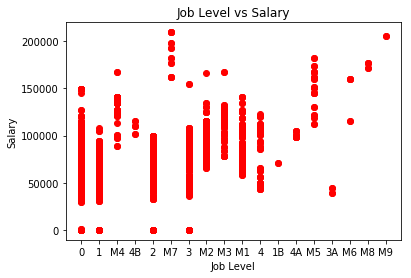

After data preprocessing



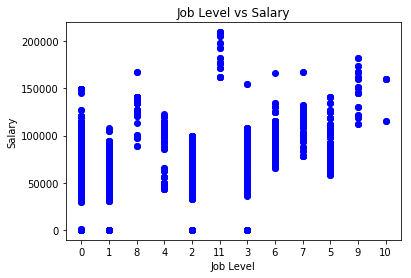

In [37]:
temp=data[:,0]
print("Before data preprocessing\n")
plt.scatter(temp, Y, color='Red')
plt.title("Job Level vs Salary")
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()

for i in range(data.shape[0]):
    if temp[i]=='1B':
        temp[i]='1'
    elif temp[i]=='3A': 
        temp[i]='3'
    elif temp[i]=='4' or temp[i]=='4A' or temp[i]=='4B':
        temp[i]='4'
    elif temp[i]=='M1': 
        temp[i]='5'
    elif temp[i]=='M2':
        temp[i]='6'
    elif temp[i]=='M3': 
        temp[i]='7'
    elif temp[i]=='M4': 
        temp[i]='8'
    elif temp[i]=='M5':
        temp[i]='9'
    elif temp[i]=='M6':
        temp[i]='10'
    elif temp[i]=='M7' or temp[i]=='M8' or temp[i]=='M9':
        temp[i]='11'
data[:, 0]=temp

print("After data preprocessing\n")
plt.scatter(temp, Y, color='Blue')
plt.title("Job Level vs Salary")
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()

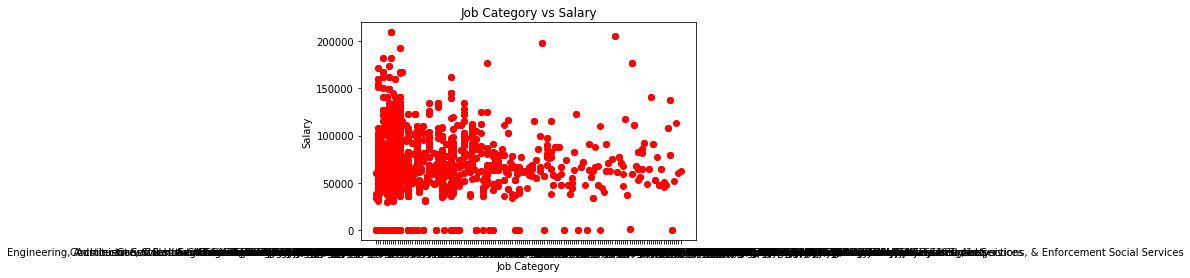

After data preprocessing



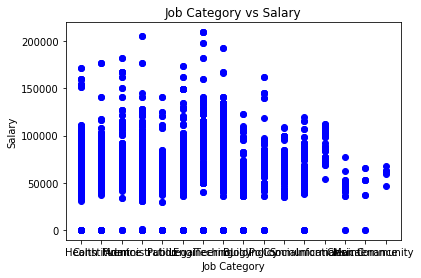

In [38]:
temp=data[:, 1]

for i in range(data.shape[0]):
     if str(temp[i])=='nan':
         temp[i]="Administration"

plt.scatter(temp, Y, color='Red')
plt.title("Job Category vs Salary")
plt.xlabel('Job Category')
plt.ylabel('Salary')
plt.show()


for i in range(data.shape[0]):
  if str(temp[i])!='nan':
    x=temp[i].split(" ")[0]
    x=x.split(",")[0]
    temp[i]=x
  else: 
    temp[i]="Administration"
        
data[:, 1]=temp        

print("After data preprocessing\n")
plt.scatter(temp, Y, color='Blue')
plt.title("Job Category vs Salary")
plt.xlabel('Job Category')
plt.ylabel('Salary')
plt.show()

In [0]:
X=data[:,[0,1,2]]


from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0]= labelencoder_X.fit_transform(X[:, 0])
X[:, 1]= labelencoder_X.fit_transform(X[:, 1])
X[:, 2]= labelencoder_X.fit_transform(X[:, 2]) 


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of Train data:", X_train.shape)
print("Shape of Train data:", X_test.shape)

Shape of Train data: (3152, 3)
Shape of Train data: (788, 3)


In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)  
regressor.fit(X_train, Y_train)  
y_pred = regressor.predict(X_test)  


Mean Absolute Error: 10609.656394615271
Mean Squared Error: 228066188.2747663
Root Mean Squared Error: 15101.860424290986


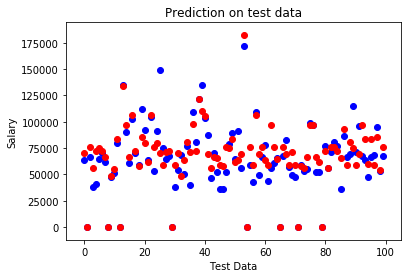

In [42]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))  

pts = 100
plt.scatter(range(pts), Y_test[:pts], color='Blue')
plt.scatter(range(pts), y_pred[:pts], color='red')
plt.title("Prediction on test data")
plt.xlabel('Test Data')
plt.ylabel('Salary')
plt.show()

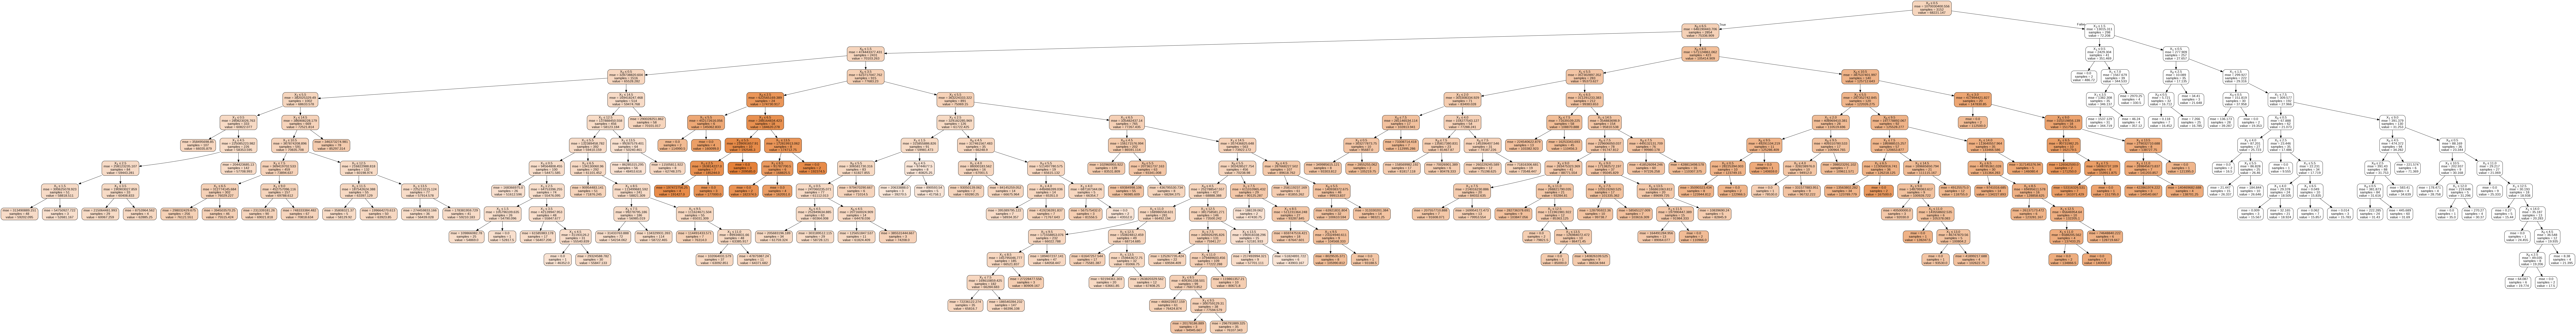

In [43]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())